In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# Read in the Data

In [4]:
column_names = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country', "target"]

In [5]:
adultDF = pd.read_csv('./data/adult.data', index_col=False, names=column_names)

In [6]:
adultDF = strip_spaces(adultDF)

stripped leading/trailing spaces from all cells of string type


In [7]:
columns_with_placeholders = ['workclass', 'occupation', 'native-country']
adultDF = replace_column_w_nan(adultDF, columns_with_placeholders, "?")

Replaced ? values from these columns:['workclass', 'occupation', 'native-country']


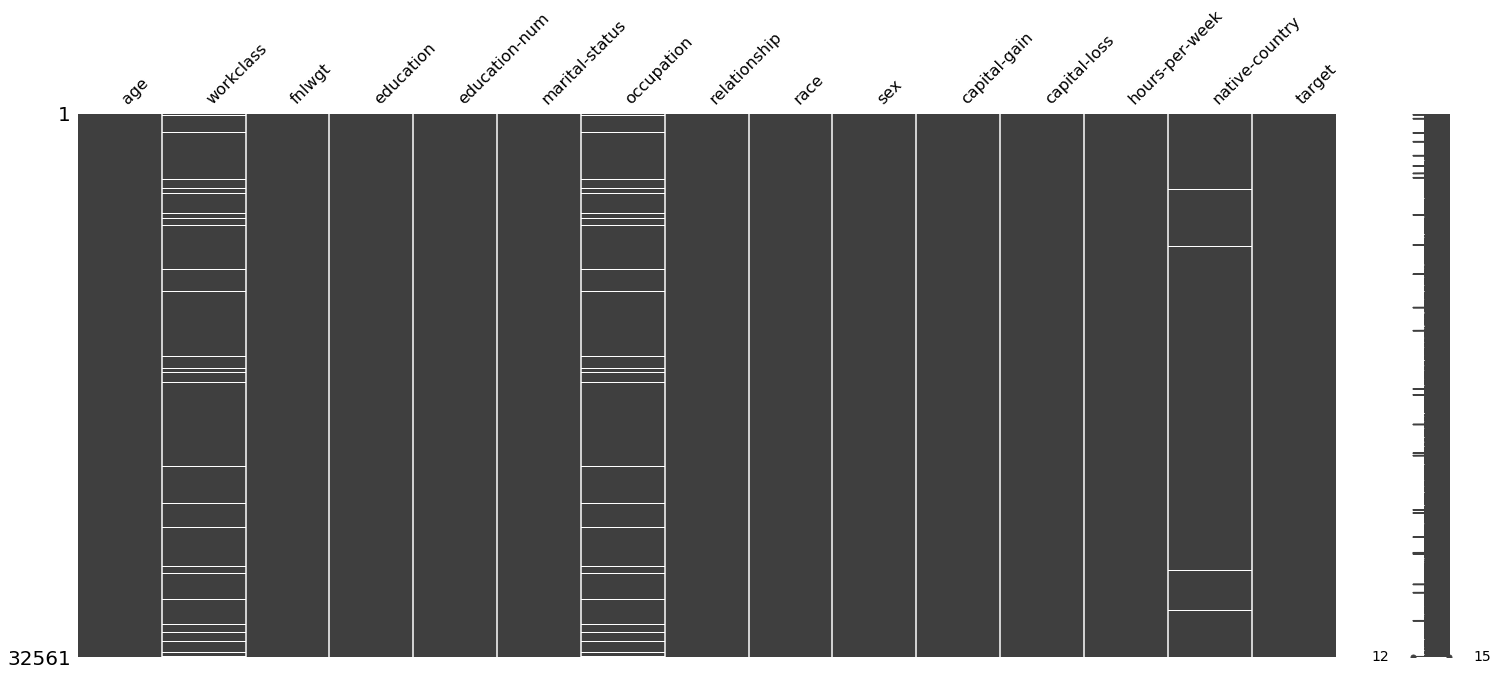

In [8]:
msno.matrix(adultDF)

In [9]:
for column in columns_with_placeholders:
    missing_values = adultDF[column].isna().sum()
    total_rows = adultDF.shape[0]
    percentage = missing_values / total_rows
    percentage = round(percentage * 100, 1)
    print("The {} column is missing {}% of rows".format(column, percentage))

The workclass column is missing 5.6% of rows
The occupation column is missing 5.7% of rows
The native-country column is missing 1.8% of rows


#### 99999 clearly is a placeholder value given that the next closest capital-gain value is 41310. Therefore, we could consider 99999 an outlier

In [10]:
adultDF[adultDF['capital-gain'] > 20000]['capital-gain'].value_counts().sort_index(ascending=False)

99999    159
41310      2
34095      5
27828     34
25236     11
25124      4
22040      1
20051     37
Name: capital-gain, dtype: int64

In [14]:
adultDF[adultDF['capital-gain'] == 99999].shape[0]/adultDF.shape[0] * 100

0.4883142409631154

#### Since .49% of the data is considered an outlier for capital-gain, we will drop those corresponding rows

In [15]:
adultDF['hours-per-week'].value_counts().sort_index(ascending=False)

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
      ... 
30    1149
29       7
28      86
27      30
26      30
25     674
24     252
23      21
22      44
21      24
20    1224
19      14
18      75
17      29
16     205
15     404
14      34
13      23
12     173
11      11
10     278
9       18
8      145
7       26
6       64
5       60
4       54
3       39
2       32
1       20
Name: hours-per-week, Length: 94, dtype: int64

#### The number of hours per week could very well reach 99 hours and could realistically dip down to 1 hour given that our data includes a younger population. Therefore, 'hours-per-week' will not be treated as if it contains outliers.

In [20]:
adultDF.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
adultDF[adultDF['capital-gain'] > 0].shape[0]/adultDF.shape[0] * 100

8.328982525106724

In [22]:
adultDF[adultDF['capital-gain'] > 0].shape[0] 

2712

#### 2712 people have made some kind of capital gain out of 32561